<a href="https://colab.research.google.com/github/mohanrajmit/DL-Training/blob/master/Pima_Neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("/content/pima-indians-diabetes.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    768 non-null    int64  
 1   Plas    768 non-null    int64  
 2   Pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.shape

(768, 9)

In [6]:
data.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [47]:
cor = data.corr()

In [48]:
cor

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [5]:
data.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
X = data.drop('class',axis=1)

In [8]:
X.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [9]:
y = data[['class']]

In [10]:
y.head()

,class
0,1
1,0
2,1
3,0
4,1


In [11]:
from tensorflow.keras.layers import Dense

In [13]:
from tensorflow.keras.models import Sequential

In [14]:
model = Sequential()

In [15]:
model.add(Dense(12,activation='relu',input_dim=8))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 10)                130       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 249 (996.00 Byte)
Trainable params: 249 (996.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=40)

In [34]:
X_train.shape

(614, 8)

In [35]:
X_test.shape

(154, 8)

In [36]:
H = model.fit(X_train,y_train,epochs=500,batch_size=46,validation_data=(X_test,y_test))

Epoch 1/500
14/14 [==============================] - 1s 25ms/step - loss: 2.3065 - accuracy: 0.6254 - val_loss: 1.4190 - val_accuracy: 0.7013
Epoch 2/500
14/14 [==============================] - 0s 8ms/step - loss: 1.8026 - accuracy: 0.6221 - val_loss: 1.2917 - val_accuracy: 0.6558
Epoch 3/500
14/14 [==============================] - 0s 11ms/step - loss: 1.4369 - accuracy: 0.6303 - val_loss: 1.0013 - val_accuracy: 0.6818
Epoch 4/500
14/14 [==============================] - 0s 8ms/step - loss: 1.1122 - accuracy: 0.6221 - val_loss: 0.9299 - val_accuracy: 0.6494
Epoch 5/500
14/14 [==============================] - 0s 7ms/step - loss: 0.9916 - accuracy: 0.6270 - val_loss: 0.8219 - val_accuracy: 0.6169
Epoch 6/500
14/14 [==============================] - 0s 6ms/step - loss: 0.8841 - accuracy: 0.6270 - val_loss: 0.7915 - val_accuracy: 0.6364
Epoch 7/500
14/14 [==============================] - 0s 7ms/step - loss: 0.8421 - accuracy: 0.6417 - val_loss: 0.8951 - val_accuracy: 0.6169
Epoch 8/500

In [37]:
import matplotlib.pyplot as plt


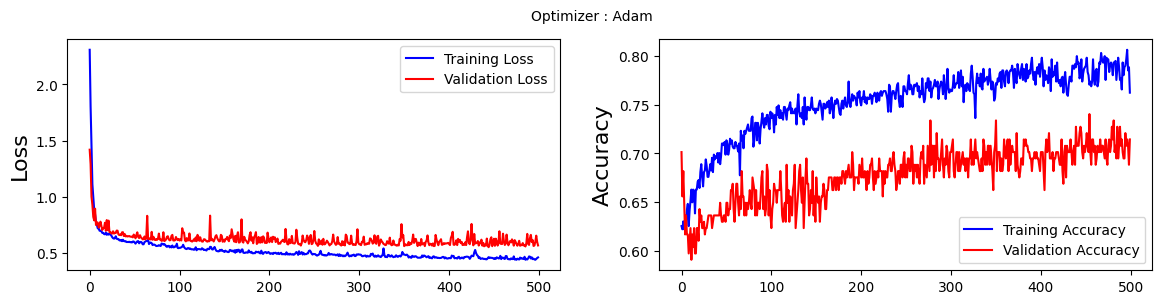

In [38]:

plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(H.history['loss'], color='b', label='Training Loss')
plt.plot(H.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(H.history['accuracy'], color='b', label='Training Accuracy')
plt.plot(H.history['val_accuracy'], color='r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()


In [39]:
model_predicted = model.predict(X_test)

5/5 [==============================] - 0s 3ms/step


In [40]:
model_predicted

array([[0.27670878],
       [0.6396061 ],
       [0.917774  ],
       [0.23027271],
       [0.01352428],
       [0.2538012 ],
       [0.92736334],
       [0.8770006 ],
       [0.22207285],
       [0.56428   ],
       [0.80312395],
       [0.4568204 ],
       [0.20689398],
       [0.39520594],
       [0.33653775],
       [0.34850025],
       [0.27676284],
       [0.20432188],
       [0.7094566 ],
       [0.18267833],
       [0.47581792],
       [0.11803851],
       [0.28505135],
       [0.81412756],
       [0.42447063],
       [0.4190668 ],
       [0.7391356 ],
       [0.433609  ],
       [0.18179893],
       [0.6587139 ],
       [0.10659565],
       [0.40823963],
       [0.3600906 ],
       [0.94196874],
       [0.05261672],
       [0.37235707],
       [0.6054999 ],
       [0.37164074],
       [0.81016594],
       [0.964365  ],
       [0.81402946],
       [0.99884325],
       [0.05610085],
       [0.11120652],
       [0.14691682],
       [0.47798884],
       [0.05714997],
       [0.162

In [41]:
predictions = model_predicted > 0.5

In [42]:
predictions

array([[False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [

In [43]:
from sklearn.metrics import confusion_matrix, classification_report
# Calculate how many mis-classifications the model makes
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(f"True Positives: {tp}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")

True Positives: 31
True Negatives: 79
False Positives: 16
False Negatives: 28


In [44]:
report = classification_report(y_test, predictions)

In [46]:
print(report)

              precision    recall  f1-score   support

           0       0.74      0.83      0.78        95
           1       0.66      0.53      0.58        59

    accuracy                           0.71       154
   macro avg       0.70      0.68      0.68       154
weighted avg       0.71      0.71      0.71       154

